# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

print(cities)

['esperance', 'san patricio', 'barrow', 'nome', 'miandrivazo', 'busselton', 'homa bay', 'port hardy', 'toliary', 'serrana', 'punta arenas', 'vao', 'tuktoyaktuk', 'port alfred', 'cape town', 'camargo', 'mar del plata', 'coihaique', 'cidreira', 'ituni', 'rikitea', 'mataura', 'maragogi', 'upernavik', 'torbay', 'dinsor', 'victoria', 'bluff', 'chokurdakh', 'nikolskoye', 'itarema', 'samarai', 'vaini', 'port lincoln', 'pratapgarh', 'ushuaia', 'kaberamaido', 'morristown', 'sokol', 'guerrero negro', 'port-cartier', 'bengkulu', 'zhuhai', 'saint-philippe', 'albany', 'hamilton', 'srednekolymsk', 'erenhot', 'puerto ayora', 'sinnamary', 'yellowknife', 'sentyabrskiy', 'florianopolis', 'bayir', 'warqla', 'cabedelo', 'vasilyevskiy mokh', 'jamestown', 'hermanus', 'georgetown', 'mgachi', 'kalnibolotskaya', 'sechura', 'samusu', 'soni', 'basco', 'barentsburg', 'barabinsk', 'bredasdorp', 'geraldton', 'jiazi', 'hithadhoo', 'santa maria', 'mandalgovi', 'gigmoto', 'belushya guba', 'khatanga', 'tiksi', 'emerald

In [30]:
cities =['esperance', 'san patricio', 'barrow', 'nome', 'miandrivazo', 'busselton', 'homa bay', 'port hardy', 'toliary', 'serrana', 'punta arenas', 'vao', 'tuktoyaktuk', 'port alfred', 'cape town', 'camargo', 'mar del plata', 'coihaique', 'cidreira', 'ituni', 'rikitea', 'mataura', 'maragogi', 'upernavik', 'torbay', 'dinsor', 'victoria', 'bluff', 'chokurdakh', 'nikolskoye', 'itarema', 'samarai', 'vaini', 'port lincoln', 'pratapgarh', 'ushuaia', 'kaberamaido', 'morristown', 'sokol', 'guerrero negro', 'port-cartier', 'bengkulu', 'zhuhai', 'saint-philippe', 'albany', 'hamilton', 'srednekolymsk', 'erenhot', 'puerto ayora', 'sinnamary', 'yellowknife', 'sentyabrskiy', 'florianopolis', 'bayir', 'warqla', 'cabedelo', 'vasilyevskiy mokh', 'jamestown', 'hermanus', 'georgetown', 'mgachi', 'kalnibolotskaya', 'sechura', 'samusu', 'soni', 'basco', 'barentsburg', 'barabinsk', 'bredasdorp', 'geraldton', 'jiazi', 'hithadhoo', 'santa maria', 'mandalgovi', 'gigmoto', 'belushya guba', 'khatanga', 'tiksi', 'emerald', 'anloga', 'vrangel', 'saleaula', 'dubuque', 'wawa', 'yulara', 'coquimbo', 'ozinki', 'eureka', 'asadabad', 'lata', 'kodiak', 'palana', 'shitkino', 'atasu', 'hobart', 'tecoanapa', 'pevek', 'illoqqortoormiut', 'fairview', 'carnarvon', 'kovdor', 'taburi', 'palabuhanratu', 'attawapiskat', 'sukhumi', 'talnakh', 'byron bay', 'canavieiras', 'karlstad', 'taolanaro', 'severo-kurilsk', 'butaritari', 'ribeira grande', 'chuy', 'corinto', 'lorengau', 'atuona', 'kapaa', 'san policarpo', 'castro', 'leningradskiy', 'vestmannaeyjar', 'alexandria', 'lebu', 'san cristobal', 'cherskiy', 'orotukan', 'kyrksaeterora', 'ciudad bolivar', 'dikson', 'mys shmidta', 'oranjestad', 'meadow lake', 'ponta delgada', 'longyearbyen', 'conde', 'wanning', 'opuwo', 'palmer', 'katherine', 'tocopilla', 'college', 'merauke', 'bulawayo', 'north platte', 'garowe', 'gladbeck', 'belomorsk', 'aden', 'tuim', 'avarua', 'debre birhan', 'hervey bay', 'tasiilaq', 'qaanaaq', 'tabas', 'derzhavinsk', 'andenes', 'umzimvubu', 'saskylakh', 'farah', 'hammerfest', 'bara', 'bestobe', 'alta floresta', 'greenfield', 'port hedland', 'itoman', 'namibe', 'vardo', 'port macquarie', 'cap malheureux', 'ulaangom', 'clyde river', 'saint george', 'takapau', 'hilo', 'prado', 'ishigaki', 'ketchikan', 'klaksvik', 'malazgirt', 'aksarka', 'santa marta de tormes', 'ponta do sol', 'tunceli', 'ornskoldsvik', 'xining', 'constitucion', 'makung', 'shu', 'pundaguitan', 'ixtapa', 'vaitupu', 'san jose iturbide', 'makakilo city', 'auki', 'omboue', 'saldanha', 'la playa', 'taquari', 'los llanos de aridane', 'maumere', 'ancud', 'huarmey', 'iquique', 'alpena', 'port blair', 'bambous virieux', 'merrill', 'zhigansk', 'fort nelson', 'kotma', 'nanakuli', 'new norfolk', 'teya', 'east london', 'buraydah', 'arraial do cabo', 'moengo', 'skibbereen', 'narsaq', 'kuminskiy', 'mizur', 'ambilobe', 'kruisfontein', 'prince rupert', 'port elizabeth', 'satitoa', 'dhidhdhoo', 'grand gaube', 'mathathane', 'taoudenni', 'hualmay', 'kaitangata', 'amderma', 'norman wells', 'slavyanka', 'natal', 'baillif', 'lakes entrance', 'faanui', 'lompoc', 'nishihara', 'borogontsy', 'fevralsk', 'pokhara', 'turukhansk', 'cruden bay', 'yanan', 'storm lake', 'matara', 'zhenhai', 'kieta', 'cervo', 'bethel', 'kurumkan', 'koplik', 'manavalakurichi', 'tacoronte', 'bolungarvik', 'lander', 'broken hill', 'saint-pierre', 'lerwick', 'altamont', 'necochea', 'evensk', 'ugoofaaru', 'tura', 'durham', 'richards bay', 'bethal', 'grand centre', 'san andres', 'sao sebastiao do passe', 'puerto escondido', 'sussex', 'codrington', 'copalillo', 'vila franca do campo', 'thompson', 'olafsvik', 'linjiang', 'pandan', 'san luis de gaceno', 'ordzhonikidze', 'dunedin', 'maues', 'rensvik', 'kasongo-lunda', 'alofi', 'lima', 'shahrud', 'aklavik', 'port hawkesbury', 'umm kaddadah', 'sur', 'gotsu', 'kununurra', 'danjiangkou', 'miercurea-ciuc', 'assens', 'rundu', 'vazante', 'erzurum', 'zunyi', 'nanortalik', 'portland', 'ati', 'namwala', 'sambava', 'cayenne', 'whitehorse', 'kijang', 'mareeba', 'zalantun', 'christchurch', 'quelimane', 'agadir', 'rosario', 'ammon', 'grand river south east', 'lakefield', 'nongpoh', 'surin', 'huajuapan', 'ginda', 'egvekinot', 'gerash', 'bathsheba', 'krasnoselkup', 'bac lieu', 'pasni', 'kawalu', 'mariinsk', 'jiuquan', 'hambantota', 'sao felix do xingu', 'pacific grove', 'salalah', 'gurgan', 'tomaszow lubelski', 'portree', 'sumbuya', 'vila velha', 'port-gentil', 'lushunkou', 'bubaque', 'vestmanna', 'kudahuvadhoo', 'hofn', 'kazalinsk', 'karauzyak', 'naryan-mar', 'iqaluit', 'biu', 'nuevo progreso', 'carutapera', 'iberia', 'ngukurr', 'provideniya', 'zilupe', 'pascagoula', 'vangaindrano', 'diamantino', 'erfurt', 'mecca', 'yefira', 'mahebourg', 'pagudpud', 'airai', 'chinsali', 'shatoy', 'severodvinsk', 'fakel', 'visby', 'hovd', 'lewistown', 'rawlins', 'margate', 'maniitsoq', 'souillac', 'louisbourg', 'dingle', 'ostersund', 'dharmanagar', 'praia da vitoria', 'hami', 'goderich', 'dawei', 'aldan', 'daru', 'cheyenne', 'sarkand', 'karaul', 'mangrol', 'kisanga', 'half moon bay', 'katangli', 'rome', 'ocumare del tuy', 'waihi', 'waddan', 'northam', 'luderitz', 'lasa', 'marcona', 'aksha', 'faya', 'kahului', 'kismayo', 'cermik', 'leshukonskoye', 'eltham', 'atar', 'mwinilunga', 'kuching', 'ahipara', 'lieksa', 'halalo', 'frontera', 'karabuk', 'kamenskoye', 'kidal', 'namatanai', 'kavieng', 'terracina', 'pierre', 'tlahualilo', 'nuuk', 'quatre cocos', 'nizhniy kuranakh', 'mamallapuram', 'qui nhon', 'galveston', 'atbasar', 'tumannyy', 'cabo san lucas', 'sakakah', 'play cu', 'matata', 'tasbuget', 'alice springs', 'huangmei', 'houma', 'koygorodok', 'te anau', 'salinopolis', 'shubarkuduk', 'la curva', 'mana', 'san quintin', 'avera', 'roald', 'fortuna', 'reitz', 'mount isa', 'belmonte', 'aquiraz', 'karratha', 'balimo', 'paamiut', 'jiaojiang', 'saint anthony', 'rio branco', 'alotau', 'tsihombe', 'saint-louis', 'along', 'yomou', 'blacksburg', 'lethem', 'seryshevo', 'zachagansk', 'sorland', 'havre-saint-pierre', 'khonuu', 'qasigiannguit', 'harper', 'saint-georges', 'magdalena', 'edd', 'nouakchott', 'celestun', 'baranchinskiy', 'cururupu', 'horbranz', 'sikandarpur', 'lemesos', 'solnechnyy', 'severobaykalsk', 'gamba', 'erzin', 'sao gabriel da cachoeira', 'lavrentiya', 'tinskoy', 'karakol', 'kindu', 'yacuiba', 'westport', 'berlevag', 'neiafu', 'ambrolauri', 'buritis', 'yirol', 'nathdwara', 'san rafael', 'pauri', 'touros', 'plouzane', 'manacapuru', 'kamensk-uralskiy', 'bima', 'elizabeth city', 'hobyo', 'asau', 'ambon', 'tautira', 'tsiroanomandidy', 'isangel', 'kota kinabalu', 'padang', 'sitka', 'bluefield', 'aleksandrov gay', 'sao jose da coroa grande', 'kenai', 'bunia', 'balabac', 'gympie', 'lubliniec', 'saint-joseph', 'north bend', 'nueva loja', 'san ignacio', 'chara', 'ust-tsilma', 'indramayu', 'ronne', 'muros', 'bonavista', 'rio grande', 'zhanaozen', 'marzuq', 'aksay', 'laguna', 'camacha', 'qaqortoq', 'poum', 'beloha', 'gao', 'kashi', 'nyurba', 'huaicheng', 'nicoya', 'tessalit', 'nkoteng', 'regente feijo', 'ola', 'puri', 'shirvan', 'mount gambier', 'deputatskiy', 'hay river', 'galle', 'rupert', 'molodizhne', 'kautokeino', 'yamada', 'iskateley', 'pedernales', 'tiarei', 'caledon', 'bayji', 'santa cruz', 'manggar', 'gravdal', 'azacualpa', 'bambanglipuro', 'tuatapere', 'goba', 'bandar-e torkaman', 'fairbanks', 'palmas', 'aguimes', 'forquilhinha', 'acarau', 'sao filipe', 'klyuchi', 'miguel hidalgo', 'nizhneyansk', 'caravelas', 'meulaboh', 'akhaldaba', 'tarko-sale', 'gardez', 'bogovina', 'manoel urbano', 'aginskoye', 'kisesa']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

temperature = []
cloudiness = []
wind_speed = []
latitude = []
longitude =[]
max_temp = []
humidity = []
country = []
date = []
cities_list = []
for city in cities:
    response = requests.get(f"{url}q={city}&appid={weather_api_key}&units={units}").json()
    try:
        wind_speed.append(response['wind']['speed'])
        temperature.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])   
        cities_list.append(response['name'])
    except:
        pass


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
weather_dict = {
    "City": cities_list,
    "Lat" : latitude,
    "Lng" : longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data_1 = pd.DataFrame(weather_dict)

weather_data_1.to_csv(r'/Users/aurelianfousse/Desktop/UCSD Bootcamp/Homework/Homework 6 - Python - API/Homework/python-api-challenge/weather_data_1.csv',index=True)

In [64]:
weather_data_1.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,51.64,58,0,13.42,AU,1632184808
1,San Patricio,28.0170,-97.5169,90.01,67,0,12.10,US,1632184999
2,Barrow,71.2906,-156.7887,33.82,64,90,14.97,US,1632184999
3,Nome,64.5011,-165.4064,37.47,65,90,16.11,US,1632185000
4,Miandrivazo,-19.5167,45.4667,73.29,75,95,3.96,MG,1632185000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_data_1.loc[weather_data_1['Humidity'] >= 100]
high_humidity.head(10)



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,wind Speed,Country,Date
65,Santa Maria,-29.6842,-53.8069,69.10,100,90,8.05,BR,1632185022
310,Hambantota,6.1241,81.1185,77.34,100,40,5.75,LK,1632185120
426,Blacksburg,37.2296,-80.4139,69.96,100,75,9.22,US,1632185170
440,Hörbranz,47.5500,9.7500,49.73,100,90,1.14,AT,1632185176
472,Kota Kinabalu,5.9749,116.0724,73.38,100,40,8.05,MY,1632185189


In [76]:
clean_weather_data = weather_data_1.drop([54, 65, 310, 426, 440, 472])

In [77]:
#verify the right items were dropped
clean_weather_data.loc[clean_weather_data['Humidity'] >= 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,wind Speed,Country,Date


In [78]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,51.64,58,0,13.42,AU,1632184808
1,San Patricio,28.0170,-97.5169,90.01,67,0,12.10,US,1632184999
2,Barrow,71.2906,-156.7887,33.82,64,90,14.97,US,1632184999
3,Nome,64.5011,-165.4064,37.47,65,90,16.11,US,1632185000
4,Miandrivazo,-19.5167,45.4667,73.29,75,95,3.96,MG,1632185000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

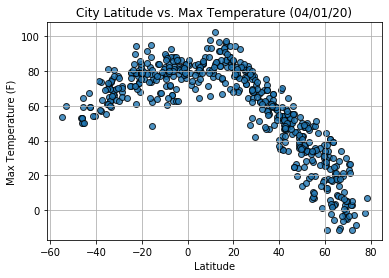

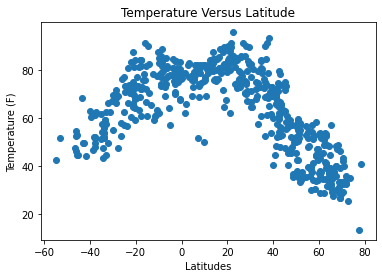

In [85]:
x = clean_weather_data['Lat']
y = clean_weather_data['Max Temp']


plt.scatter(x,y)
plt.title("Temperature Versus Latitude")
plt.xlabel("Latitudes")
plt.ylabel("Temperature (F)")
plt.show()
# Tempeartures are highed towards a latitude of 0, and lower as the absolute value of latitude increases.

## Latitude vs. Humidity Plot

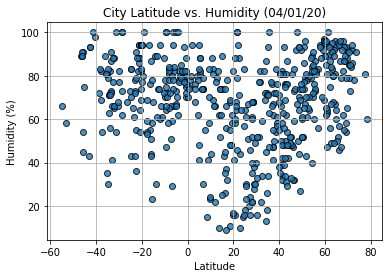

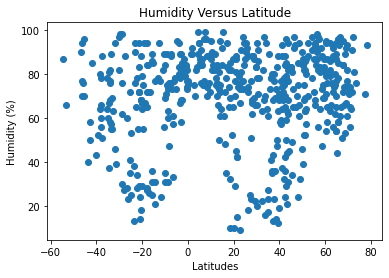

In [86]:
x = clean_weather_data['Lat']
y = clean_weather_data['Humidity']


plt.scatter(x,y)
plt.title("Humidity Versus Latitude")
plt.xlabel("Latitudes")
plt.ylabel("Humidity (%)")
plt.show()
# Humidity is higher than 60% for latitudes between -10 and 10, and above 40% passed latitude of 60.  

## Latitude vs. Cloudiness Plot

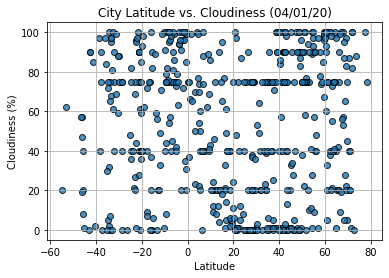

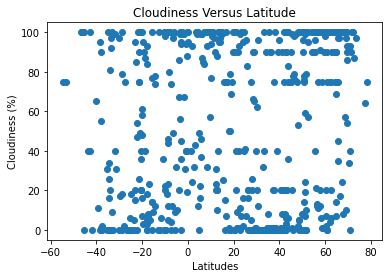

In [87]:
x = clean_weather_data['Lat']
y = clean_weather_data['Cloudiness']


plt.scatter(x,y)
plt.title("Cloudiness Versus Latitude")
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness (%)")
plt.show()
# No cloudiness trend can be established from these latitudes. 

## Latitude vs. Wind Speed Plot

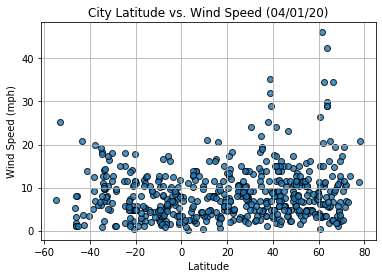

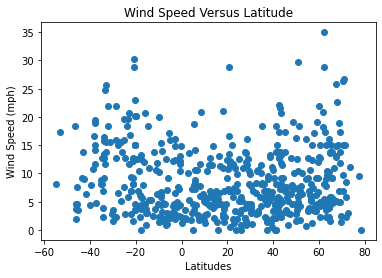

In [90]:
x = clean_weather_data['Lat']
y = clean_weather_data['wind Speed']


plt.scatter(x,y)
plt.title("Wind Speed Versus Latitude")
plt.xlabel("Latitudes")
plt.ylabel("Wind Speed (mph)")
plt.show()
# No wind speed trends can be establisehd from these latitudes. In general wind speed is below 20 mph at all latitudes.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


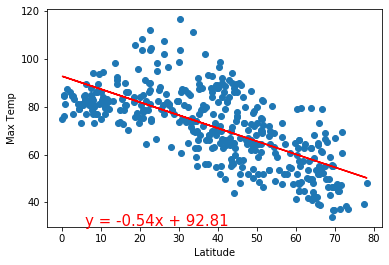

In [101]:
North_Hem = clean_weather_data.loc[clean_weather_data['Lat'] >= 0]


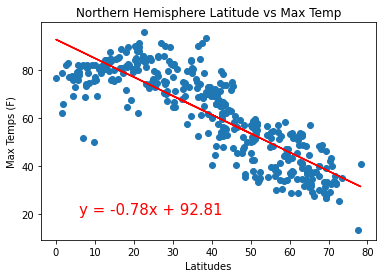

The R squared value is 0.7092108188756574


In [156]:
x = North_Hem['Lat']
y = North_Hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")
plt.xlabel('Latitudes')
plt.ylabel('Max Temps (F)')
plt.title('Northern Hemisphere Latitude vs Max Temp')
plt.show()
print(f"The R squared value is {rvalue**2}")
# The linear regression shows a downward trend in Max Temp with a coefficient of - 0.78 as latidude increases,
# and an intercept at 92.81F at latitude 0 showing that Max temps are higher at the equator for this list of cities.
# the R-square value is 0.7 which indicates that the data points are relatively close to the linear regression line.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


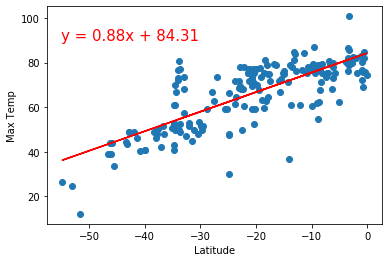

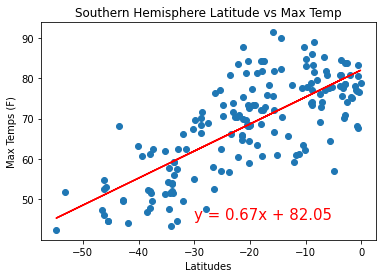

The R squared value is 0.5597157084481514


In [157]:
South_Hem = clean_weather_data.loc[clean_weather_data['Lat'] <= 0]
x = South_Hem['Lat']
y = South_Hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel('Latitudes')
plt.ylabel('Max Temps (F)')
plt.title('Southern Hemisphere Latitude vs Max Temp')
plt.show()
print(f"The R squared value is {rvalue**2}")
# The linear regression shows a upnward trend in Max Temp with a coefficient of 0.67 as latidude increases up to 0,
# and an intercept at 82.05F at latitude 0 showing that Max temps are higher at the equator for this list of cities. 
# The R square value is 0.56, which indicates that the points are relatively positioned away from the line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


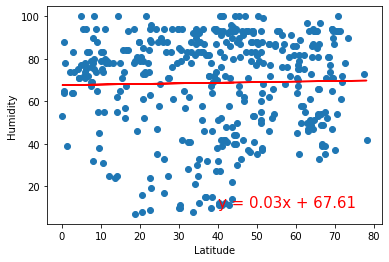

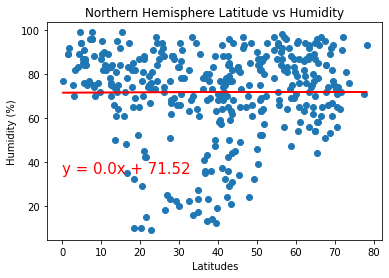

The R squared value is 1.8350599791516325e-05


In [158]:
x = North_Hem['Lat']
y = North_Hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.xlabel('Latitudes')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.show()
print(f"The R squared value is {rvalue**2}")
# The humidity shows a null trend, showing that it tends to stay constant acrosss all positive latitutes.
# the intercept combined with the null slope shows that the average of all the data points are near 71.52%.
# The R-squared value is very close to 0 indicating high variance in the data and therefore a lack of confidence in any trend
# this data could potentially infer.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


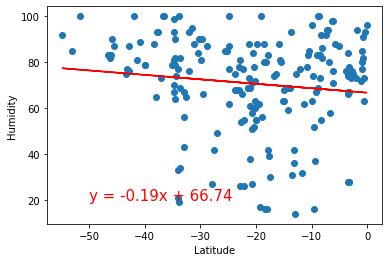

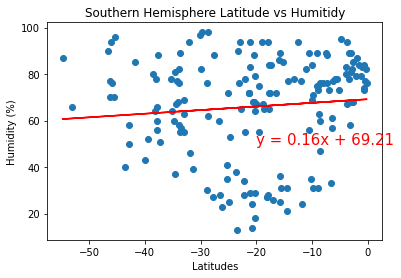

The R squared value is 0.009248375548848229


In [159]:
x = South_Hem['Lat']
y = South_Hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.xlabel('Latitudes')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Latitude vs Humitidy')
plt.show()
print(f"The R squared value is {rvalue**2}")
# The data is similar to that in the Northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


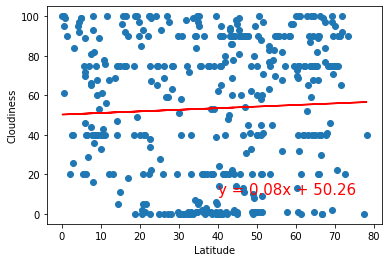

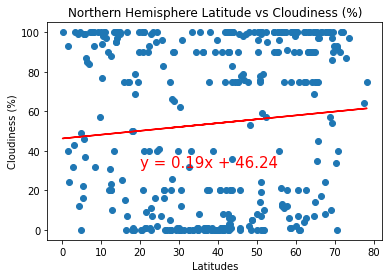

The R squared value is 0.008629616915093003


In [145]:
x = North_Hem['Lat']
y = North_Hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,32),fontsize=15,color="red")
plt.xlabel('Latitudes')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Latitude vs Cloudiness (%)')
plt.show()
print(f"The R squared value is {rvalue**2}")
# The slope and the R-squared value are close to 0 indicating that no real trend can be established from this data.
# The intercept value shows that on average cloudiness is near 46.24% in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


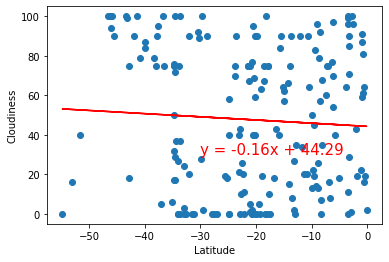

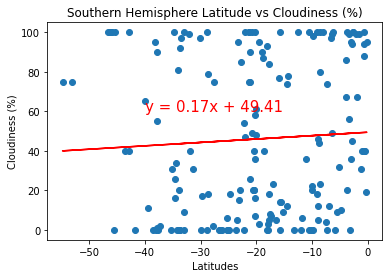

The R squared value is 0.003296008539485809


In [140]:
x = South_Hem['Lat']
y = South_Hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.xlabel('Latitudes')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Latitude vs Cloudiness (%)')
plt.show()
print(f"The R squared value is {rvalue**2}")
# Similar conclusions from the Northern hemisphere data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

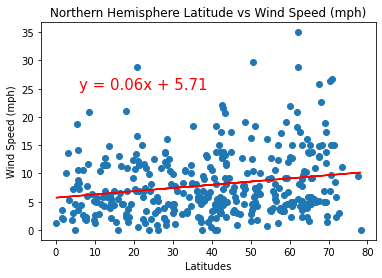

The R squared value is 0.039274843732906815


In [136]:
x = North_Hem['Lat']
y = North_Hem['wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")
plt.xlabel('Latitudes')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Latitude vs Wind Speed (mph)')
plt.show()
print(f"The R squared value is {rvalue**2}")
# The same conlsusions as established for the Cloudiness data, a near 0 slope and R square prevents us from establishing any trends.
# The average wind speed is around 5 - 6 mph in the Northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


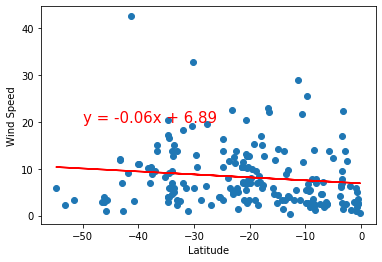

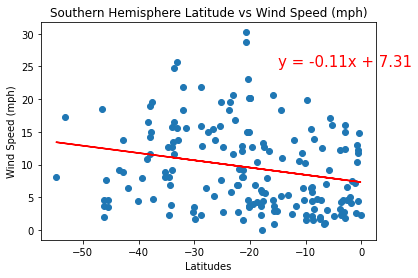

The R squared value is 0.05232620798819028


In [135]:
x = South_Hem['Lat']
y = South_Hem['wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-15,25),fontsize=15,color="red")
plt.xlabel('Latitudes')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Latitude vs Wind Speed (mph)')
plt.show()
print(f"The R squared value is {rvalue**2}")
# same conclusions as for the Northern hemisphere.